In [64]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from datetime import datetime
import mplfinance as mpl
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<div class="jumbotron">
    <p class="display-1 h1">量化交易策略</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 交易策略

<dl class="row text-danger">
    <dt class="col-md-4">交易策略</dt>
    <dd class="col-md-8">交易策略是交易员进行交易时遵循的交易规则</dd>
</dl>

## 量化交易策略的分类

<center><img src="./img/strategy/strategyType.png" width=100%></center>

## 趋势追踪策略

- 一旦市场形成下降（或上升）趋势后，就将沿着原方向运行

- 趋势策略的来源：
    - 市场并非有效，有限理性决策者对信息的解读和操作不同
    - 价格以趋势方式演变

### 趋势

<dl class="row">
    <dt class="col-md-2">趋势</dt>
    <dd class="col-md-10">价格<strong>高点</strong>和<strong>低点</strong>随时间的移动</dd>
</dl>

- 上升趋势(uptrends)：由不断**升高的高点**和不断**升高的低点**构成
- 下降趋势(downtrends)：由不断**降低的低点**和**不断降低的高点**构成
- 震荡(sideways)：当高点和低点没有上述变化规律的时候构成震荡，或称作“横向整理”

<center>
<img src="./img/strategy/updownsideways.png" width=50%>   
</center>

### 趋势判断方法

- 设置价格正常波动范围（通道），当价格突破该范围时，认为出现趋势

<center><img src="./img/strategy/bands.jfif" width=60%></center>

- 通过价格的长短期移动平均线的相对位置来判断趋势

In [4]:
aprice = web.DataReader('AAPL',start=datetime(2019,1,1),end=datetime(2020,9,9),data_source='stooq')
aprice.head()
aprice.shape

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-08,113.95,118.99,112.68,112.82,231366563
2020-09-04,120.07,123.70,110.89,120.96,332607163
2020-09-03,126.91,128.84,120.50,120.88,257599640
2020-09-02,137.59,137.98,127.00,131.40,200118991
2020-09-01,132.76,134.80,130.53,134.18,152470142


(425, 5)

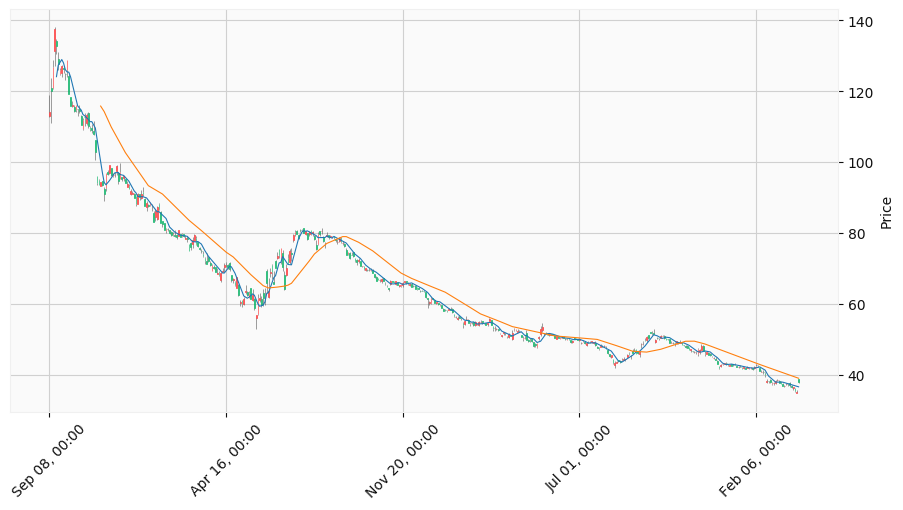

In [9]:
mpl.plot(aprice,type='candle',style='yahoo',mav=(5,30),figratio=(12,6),figscale=1)

## 统计套利

### 统计套利的定义

<dl class="row text-info">
    <dt class="col-md-4">统计套利</dt>
    <dd class="col-md-8">根据统计学的原理，利用选取的两个或多个资产的<strong>统计规律</strong>建立量化模型的套利方法</dd>
</dl>

- 假设一个策略在$t$时刻的累积收益贴现值为$v(t)$，若满足下述四个条件，则该策略是统计套利策略：
$$
\begin{split}
    (1)\quad & v(0)=0\\
    (2)\quad & \underset{t\to\infty}{\lim}E[v(t)]>0\\
    (3)\quad & \underset{t\to\infty}{\lim}P[v(t)<0]=0\\
    (4)\quad & 若\forall t<\infty, P[v(t)<0]>0, 则\underset{t\to\infty}{\lim}\frac{\text{var}[v(t)]}{t}=0
\end{split}
$$

- 统计套利是零初始成本(initial zero cost)、自融资(self-financing)的策略

- 统计套利与无风险套利的区别：统计套利在某个时间内是**可能发生亏损**的

### 统计套利的类型

- 跨期统计套利
- 跨市场统计套利
- 跨品种统计套利

### 跨期统计套利

- 利用同种商品的不同到期月份的期货合约之间出现的**异常价差**，最空价格高估合约，**同时**做多价格低估的合约，等价差回归到正常水平的时候平仓获利

- 跨期套利的来源：**季节性波动**，后者又是由于商品**供需**的季节性变化导致

### 跨市场统计套利

- 在不同市场，具有相同标的资产之间进行的套利

- 期现套利，当**期货市场**与**现货市场**在价格上出现差距，利用价格差距，低买高卖而获利

- 期现套利的来源：基差偏离持有成本
    - 基差(spread)$=$现货价格$-$期货价格

<center><img src="./img/strategy/spotfutures.jpg" width=100%></center>

##### 正向市场套利

<dl class="row">
    <dt class="col-md-4">正向市场(contango)</dt>
    <dd class="col-md-8">期货价格大于现货价格</dd>
</dl>

- **买入**现货的同时**卖出同等数量**的期货，等期现价差收敛时平掉套利头寸

##### 反向市场套利

<dl class="row">
    <dt class="col-md-4">反向市场(backwardation)</dt>
    <dd class="col-md-8">期货价格小于现货价格</dd>
</dl>

- **卖出**现货的同时**买入同等数量**的期货

### 跨品种套利

- 利用同一市场上的两种具有**高度相关性**的标的资产之间的价差进行套利

- 跨品种套利来源：两种资产的价差偏离它们之间的长期均衡关系

#### 如何选择跨品种套利

- 选择产品与原材料
    - 例如，螺纹钢与铁矿石、焦炭，生产$1$吨生铁需要$1.5\sim2$吨铁矿石和$0.4\sim0.6$吨焦炭
    - 例如，1吨大豆生产出0.2吨豆油及0.8吨豆粕

- 选择替代品
    - 例如，豆油、棕榈油、菜籽油

#### 如何判断两个产品之间具有相关性？

In [42]:
aprice = web.DataReader('AAPL',data_source='stooq',start=datetime(2018,1,1),end=datetime(2020,9,12))
aprice.head()
aprice.shape

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-11,114.57,115.23,110.00,112.00,180860325
2020-09-10,120.36,120.50,112.50,113.49,182274391
2020-09-09,117.26,119.14,115.26,117.32,176940455
2020-09-08,113.95,118.99,112.68,112.82,231366563
2020-09-04,120.07,123.70,110.89,120.96,332607163


(679, 5)

In [54]:
aprice.sort_index(inplace=True)
y = aprice['Close'][0]
ranData = []
for each in range(aprice.shape[0]):
    ranData.append(y+np.random.normal(aprice['Close'].diff().mean(),aprice['Close'].diff().std()))
    y = ranData[-1]
priceData = pd.DataFrame({'x':sorted(aprice['Close']),'y':ranData})
priceData

,x,y
0,34.782,38.880813
1,35.918,39.612368
2,36.182,40.142345
3,36.265,39.254843
4,36.695,39.504288
...,...,...
674,125.860,147.273246
675,126.520,148.405520
676,129.040,147.464945
677,131.400,144.083862


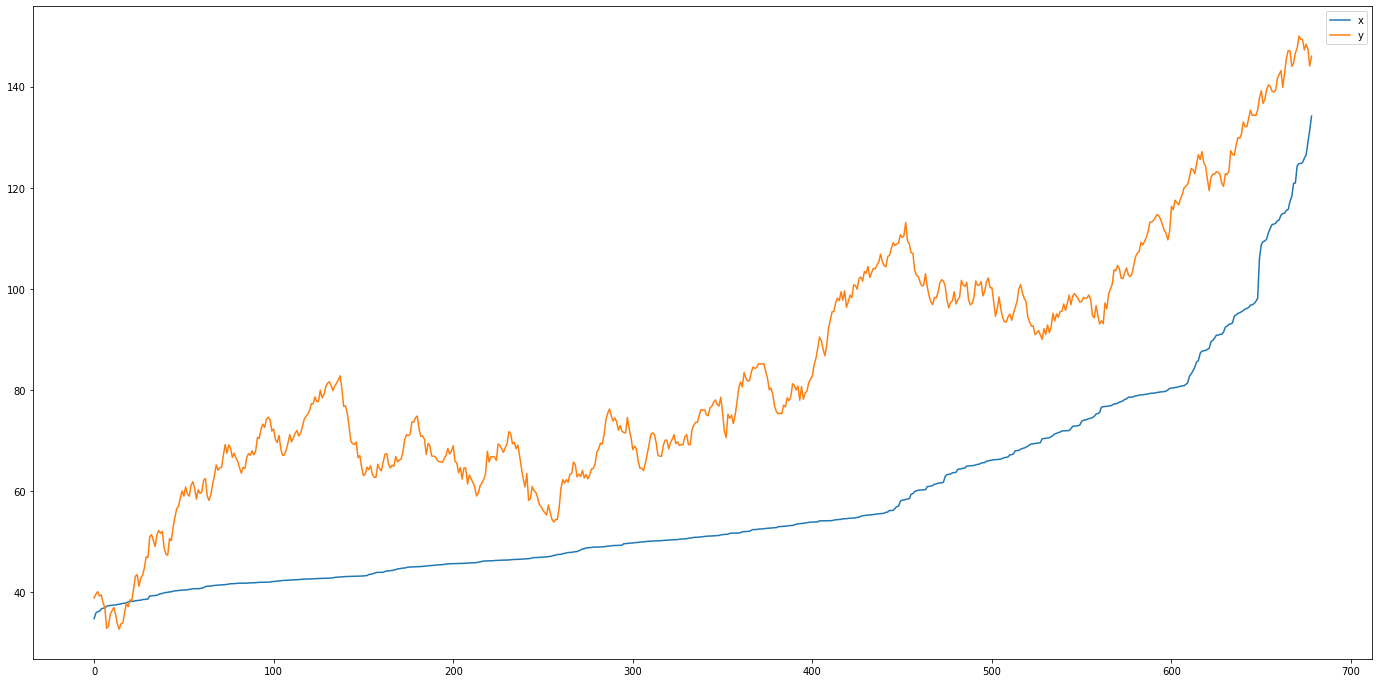

In [61]:
_ = priceData.plot(kind='line',figsize=(24,12))

- 利用回归分析计算两个产品价格之间的相关性？

In [57]:
priceData.head()
priceData.corr()      # pandas的DataFrame计算相关系数

,x,y
0,34.782,38.880813
1,35.918,39.612368
2,36.182,40.142345
3,36.265,39.254843
4,36.695,39.504288


,x,y
x,1.00000,0.91435
y,0.91435,1.00000


##### 简单回归分析

```python
pip install statsmodels
# Python中的统计模块
import statsmodels.formula.api as smf
```

In [68]:
res = smf.ols('y~x',data=priceData).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     3452.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):          5.22e-268
Time:                        07:18:42   Log-Likelihood:                -2533.2
No. Observations:                 679   AIC:                             5070.
Df Residuals:                     677   BIC:                             5079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7463      1.223     12.870      0.000      13.344      18.149
x              1.1746      0.020     58.753      0.000       1.135       1.214
==============================================================================
Omnibus:                       13.464   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.748
Skew:                           0.233   Prob(JB):                     0.000231
Kurtosis:                       3.613   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- “伪回归”(spurious regression)
    - 自变量和因变量之间表现出较强的相关性，但事实上二者没有关联

<center><img src="./img/strategy/spuriousReg.png" width=60%></center>

#### 协整分析

平稳（时间）序列是包括均值、方差和自相关等在内的统计特性不随时间发生变化的时间序列。
非平稳序列数据可能包含趋势（trend）、季节性（seasonality)，或者随机游走（random walk）。
随机游走是一种随机过程，每个时刻的数据只跟前一个数据和各自的随机误差有关。
几乎所有的原始价格时间序列数据都是非平稳的。

<dl class="row">
    <dt class="col-md-4">协整(cointegration)</dt>
    <dd class="col-md-8">两个时间序列各自都是<strong>非平稳过程</strong>，但是它们的线性组合是<strong>平稳过程</strong></dd>
</dl>

<dl class="row">
    <dt class="col-md-4">平稳过程</dt>
    <dd class="col-md-8">统计特性在时间平移下不变的随机过程</dd>
</dl>

- 假设有一个时间序列$\{X_t\}$，则该序列是平稳过程需要满足下面的条件：


1. $E[X_t] = \mu$
2. $Var[X_t] = \sigma^2$
3. $Cov(X_t, X_{t+k}) = r(k)$

<center><img src="./img/strategy/stationary.png" width=60%></center>

##### 检验协整关系

- 设有两个时间序列$\{X_t\}$ 和 $\{Y_t\}$,


1. 利用最小二乘（OLS）法估计$X_t$ 和 $Y_t$ 的长期均衡关系式$Y_t=\alpha_0+\alpha_1X_t+e_t$，并计算误差：
\begin{align}
  \hat{Y}_t &= \hat{\alpha}_0 + \hat{\alpha}_1 X_t \\
  \hat{e}_t &= Y_t - \hat{Y}_t \\
\end{align}

2. 检验残差序列$\{\hat{e}_t\}$的平稳性。可用ADF检验，如果通过检验，说明$X_t$ 和 $Y_t$具有协整关系。

- 螺纹钢（rb）与焦炭(j)关系

<center><img src="./img/strategy/cointegration.png" width=100%></center>

### 高频交易

高频交易主要是通过在极短的市场变化中进行买卖，从而获利，代表是西蒙斯的文艺复兴科技公司。

- 统计套利。通过数学统计的方法发现那些成功概率比较高的机会。比如我们发现两只食品股票的走势常年基本保持一致，就可以设置一个偏离率来进行买卖，大于某个值就买，回到正常范围内就卖出，通过计算机技术，系统可以同时统计数千只股票的偏离率，从而获利。
- 时间套利。需要掌握一定的爬虫技术和自然语言处理技术。同样一则消息人类阅读是比较慢的，而计算机阅读就可以在毫秒之间进行判断，谁第一时间掌握了消息，谁就更有机会获得收益。
- 低延迟策略。需要物理专业和通信工程的知识。国外的一些基金公司甚至利用微波来代替传统的独立光纤，因为微波在空气中的传播速度，相较于真空中的光速只慢了1%，而光在光纤中的传播速度却要减慢30%左右。

# 量化交易策略的组成

<center><img src="./img/strategy/strategyComp.png" width=100%></center>

## 交易标的

<dl class="row">
    <dt class="col-lg-4">交易标的</dt>
    <dd class="col-lg-8">应当买卖哪些产品</dd>
</dl>

- 只交易少数几个产品?
- 交易全部产品？

<center><img src="./img/strategy/rbContracts.png"  width=100%></center>

- 对于每个品种，最好交易**主力**合约

<center><img src="./img/strategy/majorContracts.png" width=100% /></center>

- 在所有主力合约中，最好选择**成交量**最大的

##### 如何选择交易标的？

- 选择交易标的的原则
> 选择交易**活跃**（成交量大）的品种合约

- 设定投资组合
    - 总有某个市场或某些产品出现趋势
    - 有些交易不明朗的市场或产品可以先观望
    - 当一些突发事件造成市场波动时，可以对冲风险

## 头寸规模

<dl class="row">
    <dt class="col-md-4">头寸规模</dt>
    <dd class="col-md-8">应当持有的交易标的的数量</dd>
</dl>

### 决定头寸规模的因素

- 可用资金量
    + **全仓**：用全部可用资金购入交易标的
    + **半仓**：用一半资金购入交易标的

- 交易标的的价格

- 市场的波动幅度
    - 波动**强**的市场，头寸规模适当**减小**
    - 波动**弱**的市场，头寸规模适当**增大**

买卖多少是交易中最重要的一个方面。大多数交易新手在单项交易中冒太大
的风险，即使他们拥有其他方面有效的交易风格，这也大大增加了他们破产的机
会。

## 入场信号

<dl class="row">
    <dt class="col-md-4">入场信号</dt>
    <dd class="col-md-8">决定何时开始建仓（加仓）的信号</dd>
</dl>

### 信号的含义

- 趋势交易策略：价格形成**突破**

- 统计套利策略：价格差出现**异常**

### 入场信号包含两种情形

- 初次建立仓位
    - 趋势交易策略：技术分析指标
    - 统计套利策略：价格差超过稳定阈值

- 加仓
    - 盈利加仓？亏损加仓？

- 盈利加仓

<center><img src="./img/strategy/winAdd.png" width=100% /></center>

- 亏损加仓

<center><img src="./img/strategy/lossAdd.png" width=100%/></center>

- 程序化交易的入市信号是由交易策略产生的

自动运行的系统产生入市信号，这些信号说明了进入市场买卖的明确的价位和市场条件。

## 离场信号

<dl class="row">
    <dt class="col-md-4">离场信号</dt>
    <dd class="col-md-8">决定何时平调持有的头寸</dd>
</dl>

- 离场信号包含
    - 止盈
    - 止损

### 止盈

> 决定何时平掉持有的盈利头寸

- 是否有必要止盈？

#### 止盈时机的选择

- 过早止盈：不能赚满整个趋势

<center><img src="./img/strategy/earlyWinExit.png" width=100% /></center>

- 过晚止盈：不能保住已经赚取的利润

<center><img src="./img/strategy/lateWinExit.png" width=100% /></center>

### 止损

> 决定何时平掉持有的亏损头寸

- 止损是在建立头寸之前，**预先**确定退出的价格位置

- 如果市场的波动触及止损价位，必须**每一次都毫无例外**退出

<center><img src="./img/strategy/stopLoss.png" width=100%></center>

长期来看，不会止住亏损的交易员不会取得成功。关于止亏，最重要的是在
你建立头寸之前预先设定退出的点位。

# “海龟”交易策略

## 背景

> 伟大的交易员是天生造就还是后天培养的?


<center> <img src="./img/strategy/richard_dennis.jpg" width=40%> </center>

Richard Dennis是一个成功的交易员，他在1980年左右已经将他不到5000$的初始投资变成了1亿。
他的合作伙伴William Eckhardt认为他的成功来自于他作为一个交易员的天分。
但是Dennis不这样认为，他认为他的交易是建立在一套交易法则基础上的，任何人掌握了这套交易法则，将能够复制他的成功。
最后他们决定做个实验来证实到底谁是对的。

他们在《巴伦氏》、《华尔街期刊》和《纽约时报》上刊登了大幅广告，招聘交易学员。
因为Richard或许是当时世界上最著名的交易员，所以有1000 多位申请人前来投奔他。他会见了其中的 80 位。
这一群人精选出 13 个人。1983 年 12 月底，学员们
被邀请到芝加哥进行两周的培训，到 1984 年 1 月初，学员们开始用小帐户进行交
易。到了 2 月初，Richard给其中的大多数人提供了 50 万$\sim$ 200 万美元的资金帐户。


- 从1000名报名者中挑选出13人
- 1983 年 12 月底，学员们被邀请到芝加哥进行两周的培训
- 1984 年初，Richard给其中的大多数人提供了 50 万$\sim$ 200 万美元的资金帐用于交易
- 学员们被称为“海龟”
- 在随后的四年中海龟们取得了年均复利80%的收益


学员们被称为“海龟”，因为Dennis相信他可以迅速的培养出交易员，就像新加坡的海龟培养员能迅速高效的培养出海龟一样。
Dennis教授这些海龟们依靠科学的方法进行交易，以减少交易对心理的冲击，因为心理的脆弱最可能使得人们犯错误从而损失惨重。
海龟成为交易史上最著名的实验，因为在随后的四年中海龟们取得了年均复利80%的收益。

> Denniss证明了交易可以被传授。他证明了用一套简单的法则，他可以仅有很少或根本没有交易经验的人成为优秀的交易员。

## 交易产品

- 芝加哥期货交易所（CBOT）    
    - 30 年期美国长期国债（Treasury Bond）、10 年期美国中期国库券（Treasury Note）
- 纽约咖啡可可与原糖交易所（NYCSC）    
    - 咖啡、可可、原糖、棉花
- 芝加哥商品交易所（CME）    
    - 瑞士法郎、德国马克、英镑、法国法郎、日圆、加拿大元、标准普尔500股票指数、欧洲美元、天美国短期国库券（Treasury Bill）  
- 纽约商品期货交易所（COMEX）    
    - 黄金、白银、铜  
- 纽约商业期货交易所（NYMEX）    
    - 原油、燃油、无铅汽油 

## 头寸规模

### 单位建仓量

- 计算当日实际波动范围（TR, True Range）：  
  $$ \text{TR} = \max\{\text{H}-\text{L}, \lvert\text{H}-\text{PDC}\rvert, \lvert\text{PDC}-\text{L}\rvert\} $$
  其中：  H——当日最高价，L——当日最低价，PDC——前个交易日的收盘价

<center><img src="./img/strategy/atr1.png" width=80%></center>

- 计算 ATR (TR的20日平均）：  
  $$ \text{ATR}_t = (19\times\text{ATR}_{t-1} + \text{TR})/20  $$ 
  其中：TR——当日的实际波动范围 

<center><img src="./img/strategy/atr.png" width=100%></center>

- 计算单位建仓量
   $$ \text{1个建仓单位} = \frac{\text{帐户资金金额的}1\%}{\text{ATR}\times\text{每点价值量（交易单位）}} $$ 

### 最大头寸限制

<center>

级别|类型|最大单位
---|---|---   
1|单一市场|4个单位
2|高度相关市场|6个单位
3|低度相关市场|10个单位  
4|单向交易（多头或空头）|12个单位
    
</center>

### 入市时机

> 以唐奇安通道(Donchian’s channel)突破作为入市时机

<dl class="row"> 
    <dt class="col-md-4">唐奇安通道</dt>
    <dd class="col-md-8">特定天数内的最高价和最低价组成的通道</dd>
</dl>

<center><img src="./img/strategy/donchian.png" width=100%></center>

- 上线=$\max（前T个交易日的最高价）$
- 下线=$\min（前T个交易日的最低价）$
- 中线=（上线+下线）/2

- $T=20$，每个交易日结束之后更新当天的数据

#### 初始建仓

- 如果当前价格<font color="red"><strong>涨过</strong></font>了前20日的<font color="red"><strong>最高价</strong></font>，建立1个单位**多头**寸
- 如果当前价格<font color="green"><strong>跌过</strong></font>了前20日的<font color="green"><strong>最低价</strong></font>，建立1个单位**空头**寸。

> 在日间**突破发生时**进行交易，而不会等到每日收盘或次日开盘

##### 读取螺纹钢日交易数据

In [107]:
rbDaily = pd.read_csv('./data/strategy/rbDaily.csv')
rbDaily.head()
rbDaily.shape

,ActionDay,Close,High,Low
0,20160104,1775,1806,1773
1,20160105,1779,1790,1761
2,20160106,1783,1786,1766
3,20160107,1772,1786,1747
4,20160108,1752,1775,1750


(1150, 4)

##### 计算TR

In [108]:
for idx, row in rbDaily.iterrows():
    if idx == 0:
        rbDaily.loc[idx,'TR'] = row['High'] - row['Low']
    else:
        rbDaily.loc[idx,'TR'] = max(row['High'] - row['Low'],np.abs(rbDaily.loc[idx-1,'Close']-row['High']),np.abs(rbDaily.loc[idx-1,'Close']-row['High']))
rbDaily.tail()

,ActionDay,Close,High,Low,TR
1145,20200826,3787,3793,3771,22.0
1146,20200827,3768,3796,3761,35.0
1147,20200828,3787,3789,3766,23.0
1148,20200831,3815,3829,3793,42.0
1149,20200901,3774,3818,3769,49.0


##### 计算ATR

In [109]:
rbDaily.loc[19,'ATR'] = rbDaily.loc[:19,'TR'].sum()/20
for idx, row in rbDaily.iterrows():
    if idx > 19:
        rbDaily.loc[idx,'ATR'] = (19*rbDaily.loc[idx-1,'ATR']+row['TR'])/20

rbDaily.head(30)

,ActionDay,Close,High,Low,TR,ATR
0,20160104,1775,1806,1773,33.0,NaN
1,20160105,1779,1790,1761,29.0,NaN
2,20160106,1783,1786,1766,20.0,NaN
3,20160107,1772,1786,1747,39.0,NaN
4,20160108,1752,1775,1750,25.0,NaN
5,20160109,1754,1756,1748,8.0,NaN
6,20160111,1753,1772,1750,22.0,NaN
7,20160112,1744,1759,1735,24.0,NaN
8,20160113,1740,1748,1736,12.0,NaN
9,20160114,1773,1777,1732,45.0,NaN


##### 计算单位头寸

In [110]:
rbDaily.tail()

,ActionDay,Close,High,Low,TR,ATR
1145,20200826,3787,3793,3771,22.0,46.155819
1146,20200827,3768,3796,3761,35.0,45.598028
1147,20200828,3787,3789,3766,23.0,44.468126
1148,20200831,3815,3829,3793,42.0,44.344720
1149,20200901,3774,3818,3769,49.0,44.577484


In [116]:
rawUnit = 1000000*0.01/(rbDaily.loc[1145,'ATR']*10)
rawUnit

21.665740746075873

In [117]:
unit = np.floor(rawUnit)
unit

21.0

#### 加仓 

- 在上一次实际成交价格的基础上，以$\frac{1}{2}$ATR的间隔增加头寸

- 假设rb的建仓价格为3800，ATR=46
    - 第1个单位头寸：$3800$
    - 第2个单位头寸：$3800+1/2*46=3823$
    - 第3个单位头寸：$3823+1/2*46=3846$
    - 第4个单位头寸：$3846+1/2*46=3869$

### 止损

> 以头寸风险为基础设置止损，任何一笔交易都不能出现 2%以上的风险

- 因为1个ATR对应的价格波动代表1%的账户权益，因此2%的风险对应价格相对于建仓方向反向波动**2个ATR**

- 例如，在3800元/吨建立第一个单位的rb头寸，则止损价位为：
    - $3800-2\times 46=3708$

> 海龟系统的止损能够适应市场的波动性

- 加仓之后，前面仓位的止损价格增加$\frac{1}{2}$ATR，导致所有仓位的止损价格距离最近加仓价格的距离为2ATR

<center><img src="./img/strategy/stopLevel.png" width=80%></center>

### 止盈

- 如果持有多头头寸，则当价格跌破 10 日最低价的时候离场
- 如果持有空头头寸，则当价格涨过10 日最高价的时候离场

海龟交易系统是一个完整的交易系统，它包括了交易的各个方面，实际上没
有给交易员留下一点主观想象决策的余地。
海龟策略从本质上讲是一个趋势跟随模型，通过唐安奇通道等突破方法确定入场和离场信号。海龟交易法则与其说是策略，不如说是一套系统，它不仅决定买卖什么、买卖多少、什么时候买卖、什么时候止损，还决定具体怎么买卖。